In [3]:
#A00832272-Julian Lawrence Gil Soares

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Dataset: Abalone Liga al dataset: https://archive.ics.uci.edu/dataset/1/abalone


Este dataset es para un problema de regresión. El objetivo es determinar la edad de los abalone a través del número de anillos que encontramos en ellos.


Modelo: Para mi solución utilizo un simple modelo de regresión lineal, este modelo no cuenta con hiper parámetros que se puedan configurar, así que la manera en la que puedo jugar con los resultados es a través de usar features distintas para la predicción.


Datos:

Número de registros: 4177

Número de características: 9

* Sex

* Length

* Diameter

* Height

* Whole weight

* Shucked weight

* Viscera weight

* Shell weight

* Rings


Clase de salida: Rings


Para las métricas de desempeño estoy utilizando R^2 y MSE. El MSE calcula la diferencia entre los valores predecidos y los valores reales, el R^2 muestra la varianza que tienen los datos.

MSE: 6.98359599679207
MSE training: 7.064932738678533
MSE validation: 95.26463774928526
R^2: 0.35487662896130234
R^2 train: 0.3287483179470918


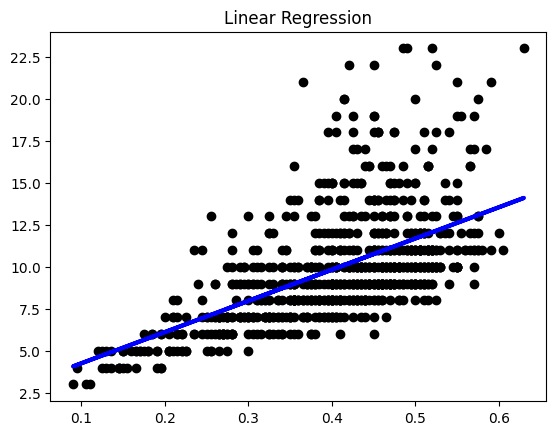

      Actual  Predicted
866        9  10.854998
1483       8  10.576414
599       16  10.669275
1702       9  11.505028
670       14   9.554939
2430      11   9.462077
1590       7   9.647800
949        6   9.369216
4026       7   7.604849
3668      10  11.040721
Variance: 3.545082158363125
MSE: 6.859520586128331
MSE training: 6.36167370802563
MSE validation: 104.36548248435763
R^2: 0.36633833826223705
R^2 train: 0.39556619501763235


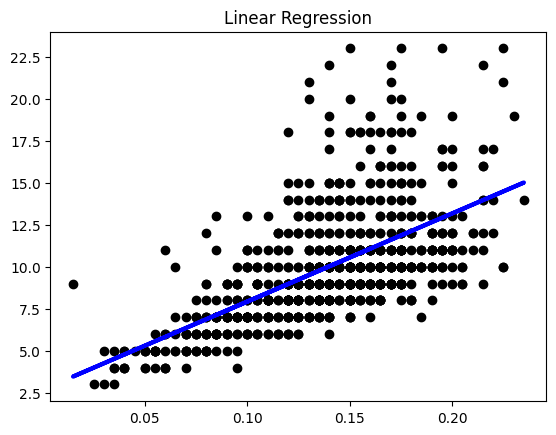

      Actual  Predicted
866        9  11.082988
1483       8  10.557970
599       16  12.920551
1702       9  11.608006
670       14  10.295461
2430      11  10.032951
1590       7   9.507933
949        6   8.720406
4026       7   7.407861
3668      10  10.295461
Variance: 4.180378170648712
MSE: 8.820565529613267
MSE training: 8.67728288132843
MSE validation: 94.05502927709766
R^2: 0.18518296712099003
R^2 train: 0.1755560958348077


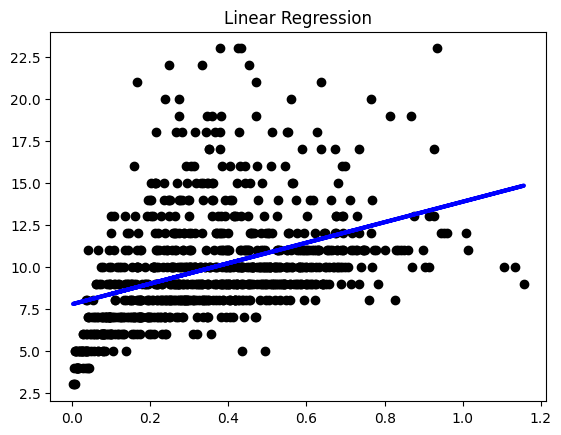

      Actual  Predicted
866        9  10.347682
1483       8  10.140175
599       16   9.639714
1702       9  11.064805
670       14   9.212492
2430      11   8.861560
1590       7   9.215544
949        6   9.734313
4026       7   8.306171
3668      10  10.417869
Variance: 1.7642560465268036
MEAN:  9.933684462532918


In [4]:
#import libraries and create dataframe
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt



columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

df = pd.read_csv('/content/drive/MyDrive/Stats/abalone.data', header=None, names=columns)

word_to_number = {
    'M':0,
    'F':1,
    'I':2
}

# cleaning data in Sex column
df['Sex'] = df['Sex'].map(word_to_number)

# assign features
feature1 = 'Diameter'
feature2 = 'Height'
feature3 = 'Shucked weight'

#print(df)

def graph(df,feature):

    X = df[[feature]]
    y = df['Rings']

    # Split data into training and a temporary set (80% training, 20% temp)
    X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Split the temporary set into validation and final test (50% validation, 50% final test)
    X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.5, random_state=42)

    # Now you have X_train, y_train (for training), X_val, y_val (for validation), and X_test, y_test (for final testing)
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    mse = mean_squared_error(y_test, y_pred)
    mseTrain = mean_squared_error(y_train, y_pred_train)
    mseVal = mean_squared_error(X_val, y_pred_val)
    r2 = r2_score(y_test, y_pred)
    r2Train = r2_score(y_train, y_pred_train)

    print("MSE:", mse)
    print("MSE training:", mseTrain)
    print("MSE validation:", mseVal)
    print("R^2:", r2)
    print("R^2 train:", r2Train)

    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title('Linear Regression')
    plt.show()

    comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    print(comparison.head(10))

    variance = np.var(y_pred)

    print("Variance:", variance)

graph(df, feature1)
graph(df, feature2)
graph(df, feature3)

print("MEAN: ",df['Rings'].mean())



|       |   MSE     |   MSE training |   MSE validation |    R^2   |   R^2 train | Feature        | Actual | Predicted |
|-------|-----------|----------------|-----------------|----------|-------------|----------------|--------|-----------|
|   1   |  6.98     |     7.06       |      95.26      |   0.355  |   0.329     | Diameter       |        |           |
|       |           |                |                 |          |             |                |   9    | 10.855    |
|       |           |                |                 |          |             |                |   8    | 10.576    |
|       |           |                |                 |          |             |                |  16    | 10.669    |
|       |           |                |                 |          |             |                |   9    | 11.505    |
|       |           |                |                 |          |             |                |  14    |  9.555    |
|       |           |                |                 |          |             |                |  11    |  9.462    |
|       |           |                |                 |          |             |                |   7    |  9.648    |
|       |           |                |                 |          |             |                |   6    |  9.369    |
|       |           |                |                 |          |             |                |   7    |  7.605    |
|       |           |                |                 |          |             |                |  10    | 11.041    |
|       |           |                |                 |          |             |                |        |           |
|   2   |  6.86     |     6.36       |     104.37      |   0.366  |   0.396     | Height         |        |           |
|       |           |                |                 |          |             |                |   9    | 11.083    |
|       |           |                |                 |          |             |                |   8    | 10.558    |
|       |           |                |                 |          |             |                |  16    | 12.921    |
|       |           |                |                 |          |             |                |   9    | 11.608    |
|       |           |                |                 |          |             |                |  14    | 10.295    |
|       |           |                |                 |          |             |                |  11    | 10.033    |
|       |           |                |                 |          |             |                |   7    |  9.508    |
|       |           |                |                 |          |             |                |   6    |  8.720    |
|       |           |                |                 |          |             |                |   7    |  7.408    |
|       |           |                |                 |          |             |                |  10    | 10.295    |
|       |           |                |                 |          |             |                |        |           |
|   3   |  8.82     |     8.68       |      94.06      |   0.185  |   0.176     | Shucked weight |        |           |
|       |           |                |                 |          |             |                |   9    | 10.348    |
|       |           |                |                 |          |             |                |   8    | 10.140    |
|       |           |                |                 |          |             |                |  16    |  9.640    |
|       |           |                |                 |          |             |                |   9    | 11.065    |
|       |           |                |                 |          |             |                |  14    |  9.212    |
|       |           |                |                 |          |             |                |  11    |  8.862    |
|       |           |                |                 |          |             |                |   7    |  9.216    |
|       |           |                |                 |          |             |                |   6    |  9.734    |
|       |           |                |                 |          |             |                |   7    |  8.306    |
|       |           |                |                 |          |             |                |  10    | 10.418    |

